In [503]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

In [460]:
df = pd.read_csv("listings_train_reg.csv")
df = df.drop(df.columns[0], axis=1)

len(df)

47806

In [461]:
df.describe()

,gig_id,position,is_click,is_filtered,gig_price,gig_avg_rating,gig_rated_orders,is_user_buyer,gig_sc_id,cnt_helpful_reviews_last_year,avg_review_length_last_3_months,avg_position_shown_last_60d,previous_order_sc_id,previous_order_amount
count,4.780600e+04,47806.000000,47806.000000,47806.000000,47788.000000,31411.000000,31411.000000,47806.000000,47789.000000,38531.000000,34435.000000,47588.000000,30371.000000,30371.000000
mean,5.454307e+12,22.529913,0.091578,0.207589,48.605298,4.430068,674.881984,0.900703,196.982695,18.494018,103.943929,25.204571,208.990715,68.189440
std,2.171282e+12,16.937335,0.288433,0.405585,153.036956,0.341667,2951.287704,0.299064,167.318787,56.634210,65.736172,9.709583,174.920873,96.641209
min,5.825611e+08,1.000000,0.000000,0.000000,5.000000,0.015017,1.000000,0.000000,10.000000,0.000000,9.000000,1.000000,10.000000,5.000000
25%,3.746052e+12,10.000000,0.000000,0.000000,10.000000,4.186006,12.000000,1.000000,53.000000,1.000000,63.000000,18.169533,55.000000,15.000000
50%,5.769424e+12,19.000000,0.000000,0.000000,20.000000,4.439841,69.000000,1.000000,146.000000,4.000000,91.227273,24.610216,147.000000,30.000000
75%,7.366429e+12,32.000000,0.000000,0.000000,45.000000,4.691765,343.000000,1.000000,343.000000,15.000000,126.410751,31.235359,365.000000,80.000000
max,8.667857e+12,96.000000,1.000000,1.000000,10000.000000,4.999783,59040.000000,1.000000,574.000000,955.000000,700.000000,89.500000,573.000000,1000.000000


In [556]:
len(df)

47806

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47806 entries, 0 to 47805
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   listing_id                       47806 non-null  object 
 1   gig_id                           47806 non-null  int64  
 2   position                         47806 non-null  int64  
 3   created_at                       47806 non-null  object 
 4   is_click                         47806 non-null  int64  
 5   context                          47806 non-null  object 
 6   operating_system                 47806 non-null  object 
 7   is_filtered                      47806 non-null  int64  
 8   gig_price                        47788 non-null  float64
 9   gig_avg_rating                   31411 non-null  float64
 10  gig_rated_orders                 31411 non-null  float64
 11  imp_badge                        47806 non-null  object 
 12  is_seller_onlie   

In [463]:
df.nunique()

listing_id                          1624
gig_id                             35291
position                              96
created_at                         35458
is_click                               2
context                                1
operating_system                       4
is_filtered                            2
gig_price                            225
gig_avg_rating                     31411
gig_rated_orders                    2929
imp_badge                              5
is_seller_onlie                        2
search_query                        1346
is_user_buyer                          2
gig_sc_id                            249
gig_title                          47501
cnt_helpful_reviews_last_year        283
avg_review_length_last_3_months    16663
avg_position_shown_last_60d        43734
user_timezone                         37
user_reg_date                       1581
previous_order_sc_id                 167
previous_order_amount                 84
previous_order_d

In [464]:
df.drop(columns = ["context"], inplace = True)

In [465]:
df.sample(2)

,listing_id,gig_id,position,created_at,is_click,operating_system,is_filtered,gig_price,gig_avg_rating,gig_rated_orders,...,gig_sc_id,gig_title,cnt_helpful_reviews_last_year,avg_review_length_last_3_months,avg_position_shown_last_60d,user_timezone,user_reg_date,previous_order_sc_id,previous_order_amount,previous_order_date
17131,a98ff15591b6be48930c7f5a1ed98d36,3542479308630,2,2023-10-31 02:03:15.494,0,mac,0,10.0,NaN,NaN,...,49.0,redesign edit OR update your logotype creative...,22.0,83.28169,20.343225,America/New_York,2016-09-09 14:51:20.000000,NaN,NaN,NaN
4179,f06a4a7a6d13f74fc5433d759125bd85,4566632291689,22,2023-10-29 00:52:41.904,0,windows,0,100.0,4.314552,60.0,...,30.0,rough drawing and lodge your tentative letters...,1.0,156.00000,16.779954,America/New_York,2018-08-30 19:22:41.447000,NaN,NaN,NaN


In [466]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["previous_order_date"] = pd.to_datetime(df["previous_order_date"])
df["user_reg_date"] = pd.to_datetime(df["user_reg_date"])
df["is_filtered"] = df["is_filtered"].astype(bool)
df["is_user_buyer"] = df["is_user_buyer"].astype(bool)

df["days_since_previous_order_date"] = df.apply(lambda r: (r["created_at"] - r["previous_order_date"]).days if r["previous_order_date"] is not None else None, axis=1)

df["hour"] = df["created_at"].apply(lambda date: date.hour)
df["weekday"] = df["created_at"].apply(lambda date: date.weekday())
df["month"] = df["created_at"].apply(lambda date: date.month)
df["has_title"] = df["gig_title"].notnull()


df["user_reg_date_month"] = df["user_reg_date"].apply(lambda date: date.month)
df["user_reg_date_year"] = df["user_reg_date"].apply(lambda date: date.year)

df["user_reg_date_year_month"] = df["user_reg_date"].apply(lambda date: f"{date.year}_{date.month}")


<AxesSubplot:xlabel='is_click', ylabel='count'>

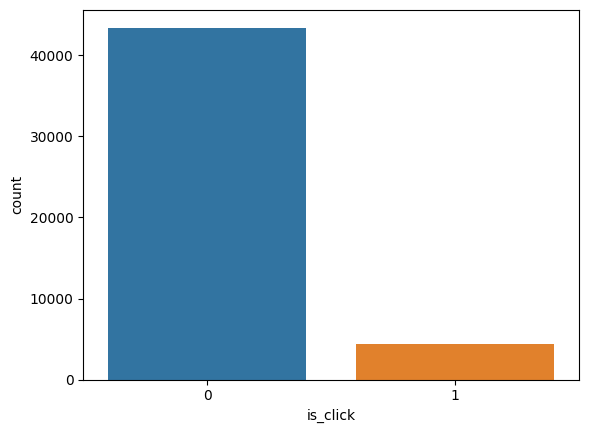

In [484]:
sns.countplot(df, x="is_click")

<AxesSubplot:xlabel='number_of_listings', ylabel='Count'>

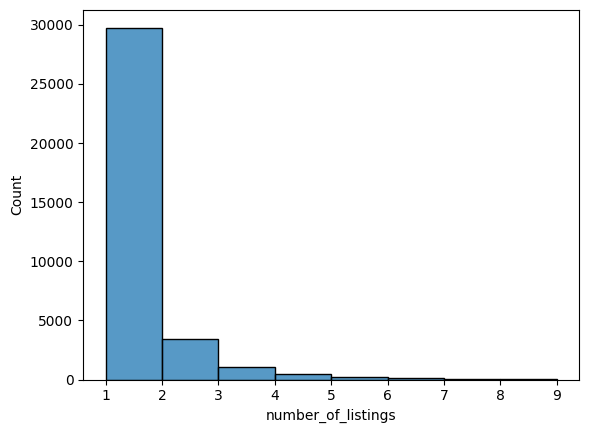

In [467]:
gig_number_of_liastings_df = df.groupby(["gig_id"]).listing_id.nunique().to_frame("number_of_listings").reset_index()
sns.histplot(data = gig_number_of_liastings_df, x="number_of_listings", bins = range(1, 10))

<AxesSubplot:xlabel='number_of_listings', ylabel='Count'>

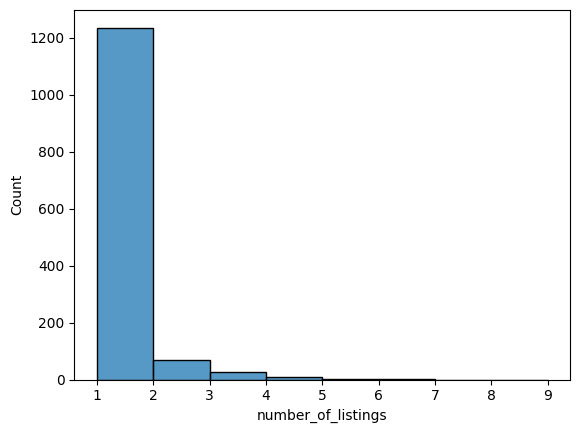

In [468]:
search_query_number_of_liastings_df = df.groupby(["search_query"]).listing_id.nunique().to_frame("number_of_listings").reset_index()
sns.histplot(data = search_query_number_of_liastings_df, x="number_of_listings", bins = range(1, 10))

<AxesSubplot:xlabel='position', ylabel='Count'>

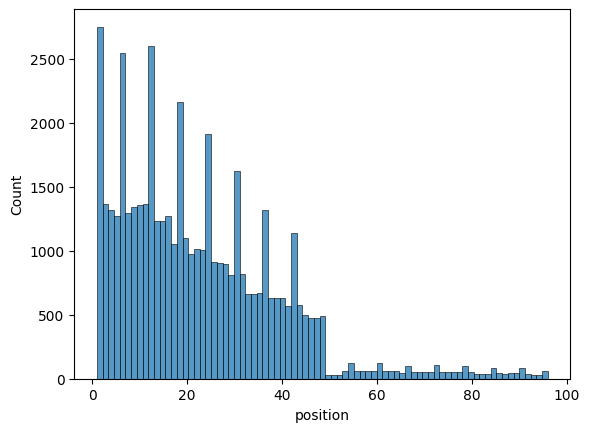

In [469]:
sns.histplot(data = df, x="position")

<AxesSubplot:xlabel='hour', ylabel='Count'>

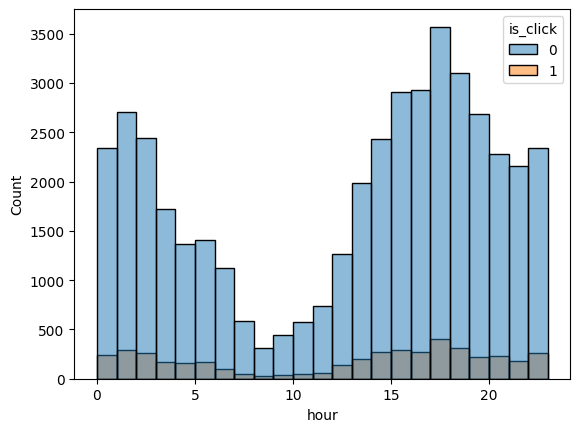

In [471]:
sns.histplot(data = df, x="hour", bins = range(0, 24), hue = "is_click")

<AxesSubplot:xlabel='month', ylabel='Count'>

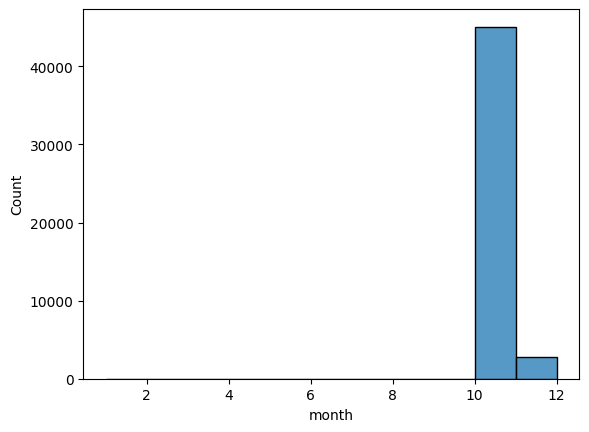

In [472]:
sns.histplot(data = df, x="month", bins = range(1, 13))

<AxesSubplot:xlabel='weekday', ylabel='Count'>

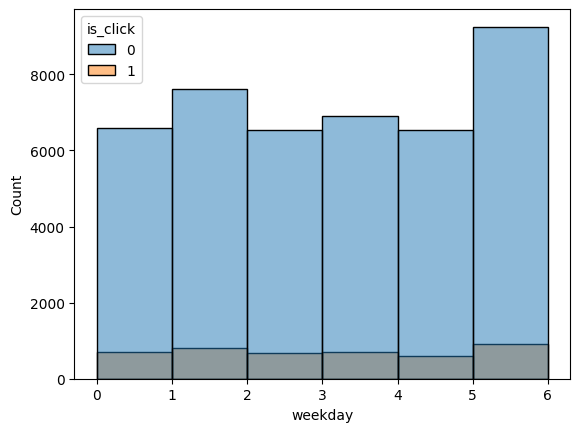

In [473]:
sns.histplot(data = df, x="weekday", bins = range(0, 7), hue = "is_click")

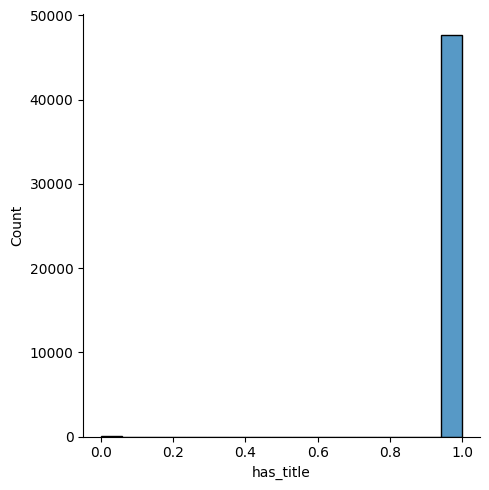

In [474]:
sns.displot(df, x="has_title")

<AxesSubplot:xlabel='weekday', ylabel='count'>

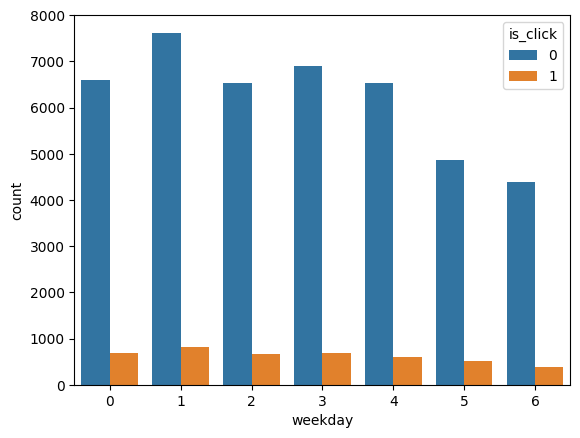

In [475]:
sns.countplot(df, x="weekday", hue = "is_click")

<AxesSubplot:xlabel='weekday', ylabel='count'>

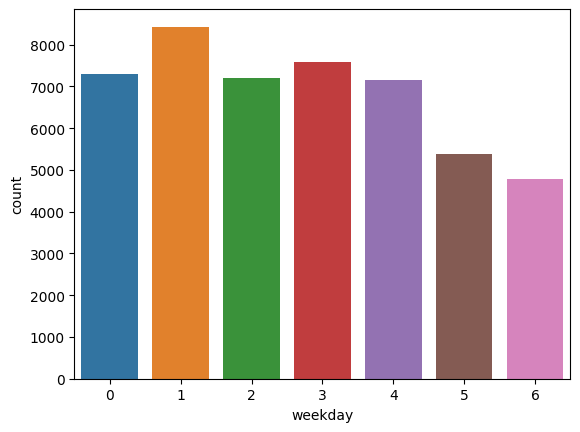

In [476]:
sns.countplot(df, x="weekday")

<AxesSubplot:xlabel='listing_number_of_clicks', ylabel='Count'>

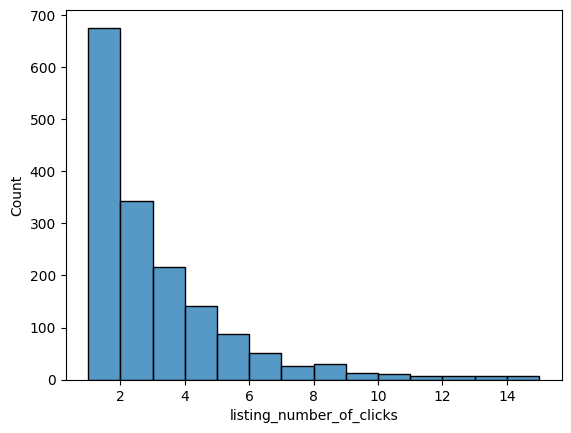

In [479]:
listing_number_of_clicks_df = df.groupby(["listing_id"])["is_click"].sum().to_frame("listing_number_of_clicks").reset_index()
sns.histplot(data = listing_number_of_clicks_df, x="listing_number_of_clicks", bins = range(1, 16))

<AxesSubplot:xlabel='gig_number_of_clicks', ylabel='Count'>

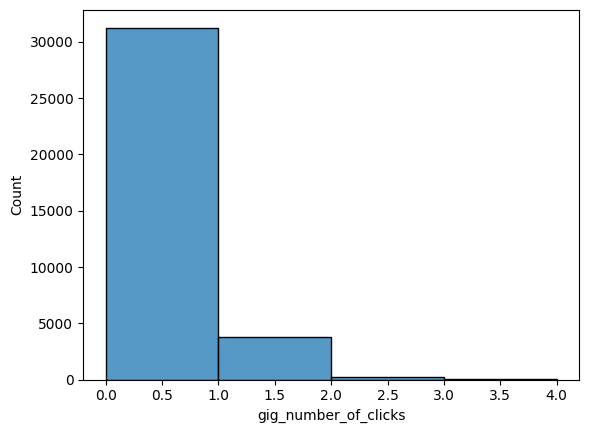

In [481]:
gig_number_of_clicks_df = df.groupby(["gig_id"])["is_click"].sum().to_frame("gig_number_of_clicks").reset_index()
sns.histplot(data = gig_number_of_clicks_df, x="gig_number_of_clicks", bins = range(0, 5))

<AxesSubplot:xlabel='position', ylabel='Count'>

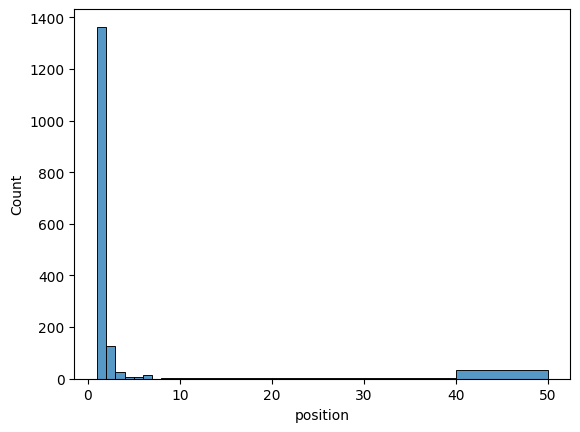

In [482]:
listing_min_position = df.groupby(["listing_id"])["position"].min().reset_index()

sns.histplot(data = listing_min_position, x="position", bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50])

<AxesSubplot:xlabel='position', ylabel='Count'>

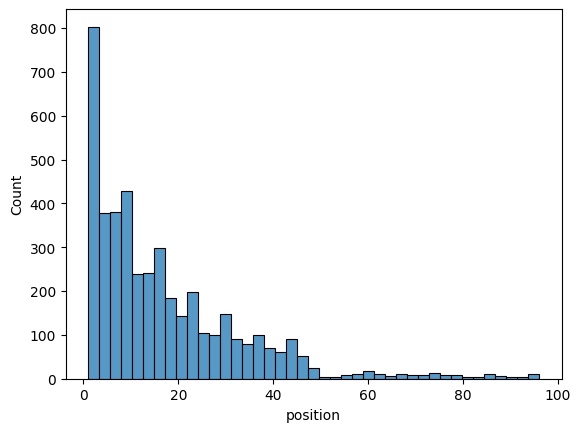

In [483]:
sns.histplot(data = clicked_df, x="position")

<AxesSubplot:xlabel='created_at', ylabel='Count'>

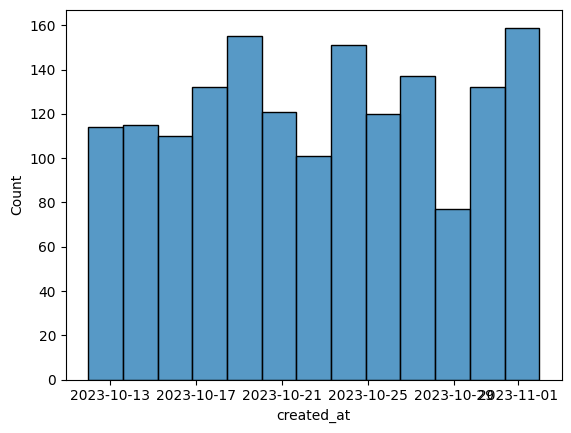

In [485]:
listing_dates = df.groupby(["listing_id"])["created_at"].min().reset_index()
len(listing_dates), len(pd.unique(df["listing_id"]))

sns.histplot(data = listing_dates, x="created_at")

<AxesSubplot:xlabel='operating_system', ylabel='count'>

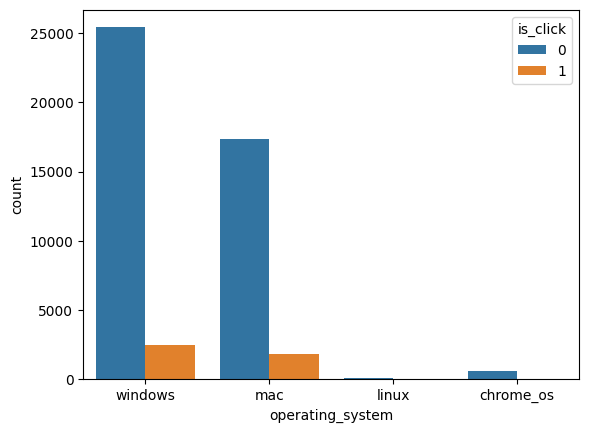

In [487]:
sns.countplot(df, x="operating_system", hue = "is_click")

<AxesSubplot:xlabel='days_since_previous_order_date', ylabel='Count'>

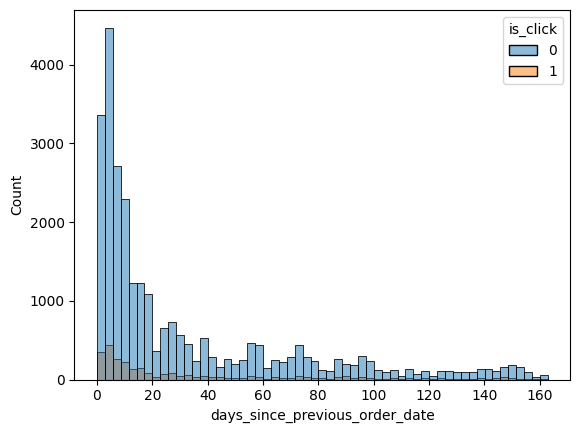

In [488]:
sns.histplot(df, x="days_since_previous_order_date", hue = "is_click")

<AxesSubplot:xlabel='is_filtered', ylabel='count'>

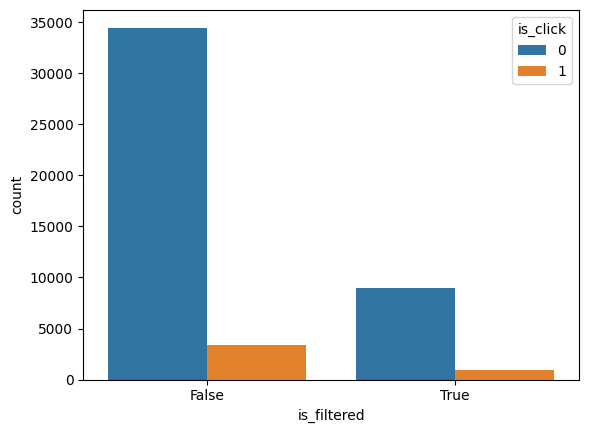

In [491]:
sns.countplot(df, x="is_filtered", hue = "is_click")

<AxesSubplot:xlabel='gig_price', ylabel='Count'>

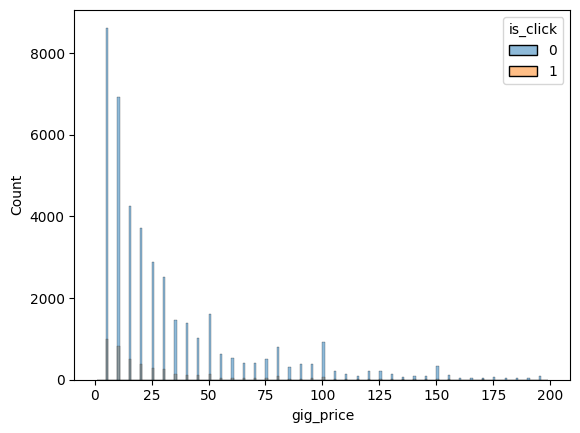

In [493]:
sns.histplot(df, x="gig_price", bins = range(1, 200), hue = "is_click")

<AxesSubplot:xlabel='gig_avg_rating', ylabel='Count'>

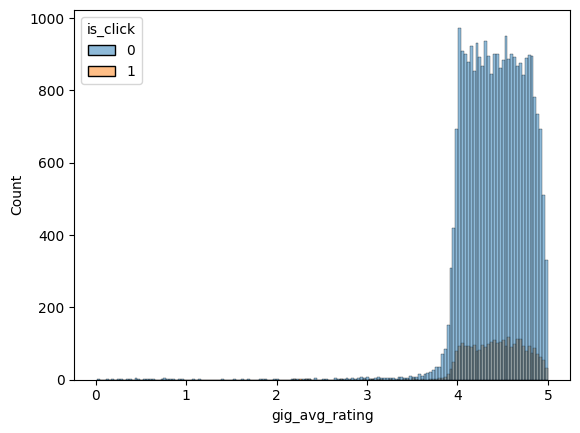

In [494]:
sns.histplot(df, x="gig_avg_rating", hue = "is_click")

<AxesSubplot:xlabel='gig_rated_orders', ylabel='Count'>

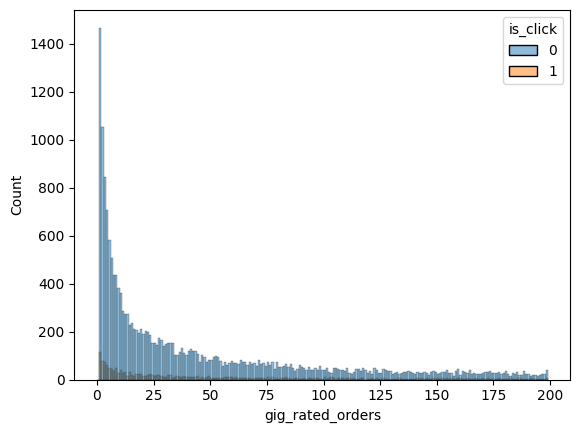

In [495]:
sns.histplot(df, x="gig_rated_orders", bins = range(0, 200), hue = "is_click")

<AxesSubplot:xlabel='imp_badge', ylabel='count'>

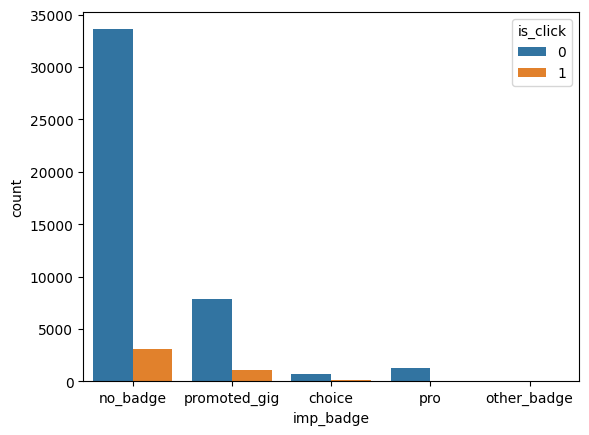

In [496]:
sns.countplot(df, x="imp_badge", hue = "is_click")


<AxesSubplot:xlabel='is_seller_onlie', ylabel='count'>

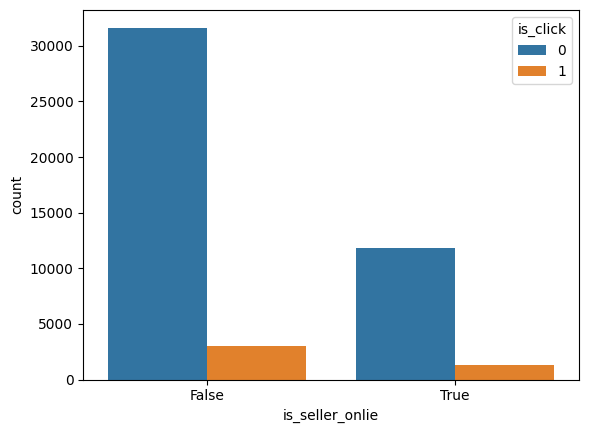

In [497]:
sns.countplot(df, x="is_seller_onlie", hue = "is_click")


<AxesSubplot:xlabel='cnt_helpful_reviews_last_year', ylabel='Count'>

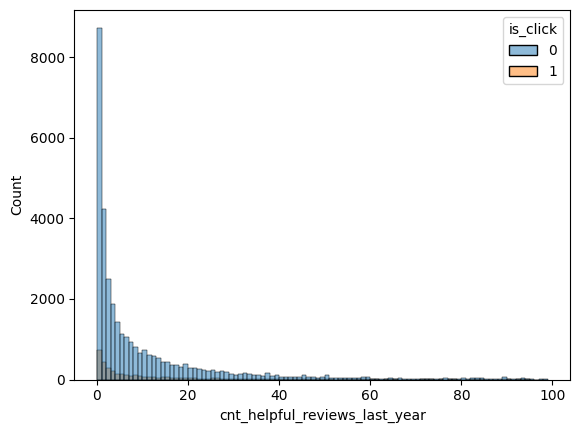

In [498]:
sns.histplot(data = df, x="cnt_helpful_reviews_last_year", bins = range(0, 100), hue = "is_click")

<AxesSubplot:xlabel='avg_review_length_last_3_months', ylabel='Count'>

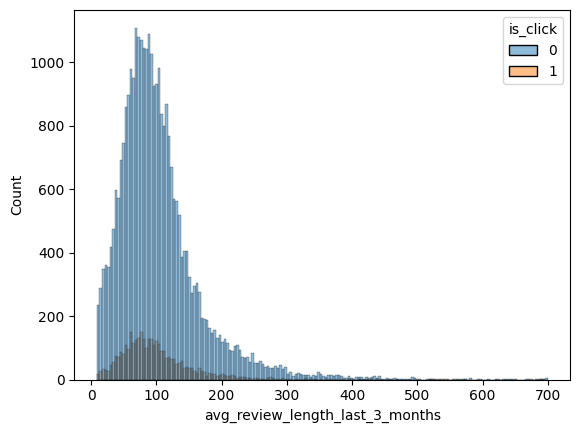

In [499]:
sns.histplot(data = df, x="avg_review_length_last_3_months", hue = "is_click")

<AxesSubplot:xlabel='previous_order_amount', ylabel='Count'>

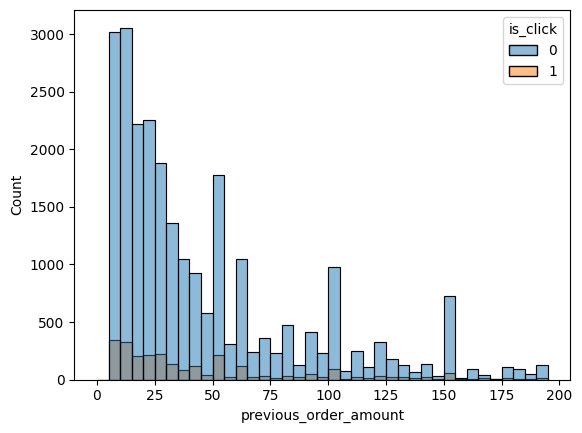

In [500]:
sns.histplot(data = df, x="previous_order_amount", bins = range(0, 200, 5), hue = "is_click")

<AxesSubplot:xlabel='avg_position_shown_last_60d', ylabel='Count'>

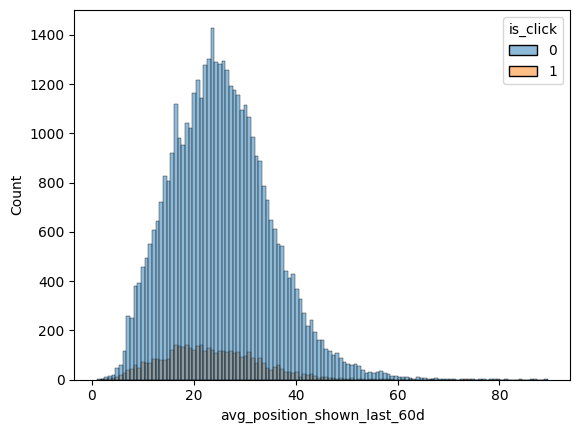

In [501]:
sns.histplot(data = df, x="avg_position_shown_last_60d", hue = "is_click")

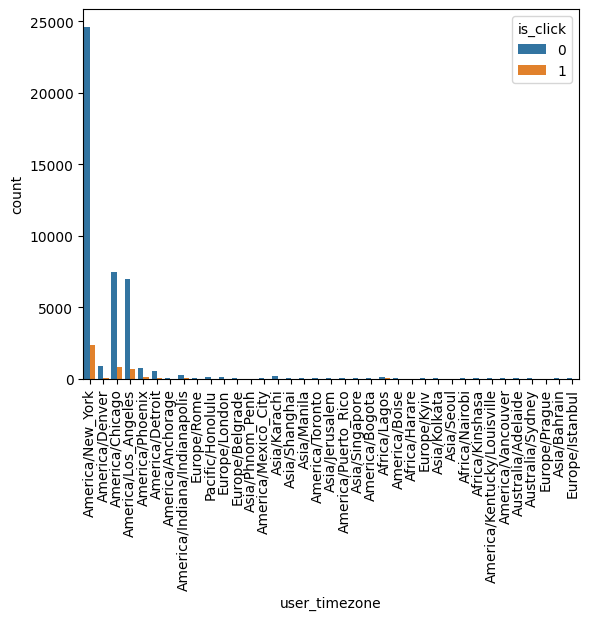

In [502]:
ax = sns.countplot(df, x="user_timezone", hue = "is_click")
ax.tick_params(axis='x', rotation=90)

In [513]:
def create_word_cloud(df, column, tokenizer):

    rows = df[df[column].notnull()][column].apply(tokenizer).tolist()

    for text in rows:
        for word in text:
            words_freq[word] += 1

    wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").fit_words(words_freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


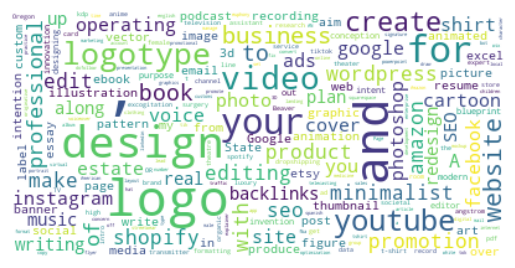

In [514]:
create_word_cloud(df, "gig_title", word_tokenize)


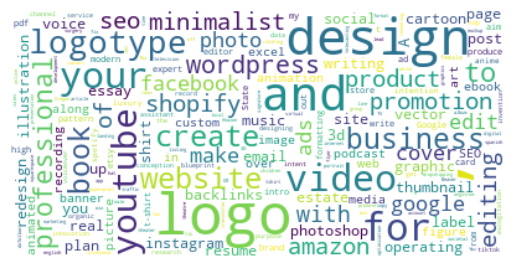

In [516]:
create_word_cloud(df, "search_query", word_tokenize)


<AxesSubplot:xlabel='count', ylabel='Count'>

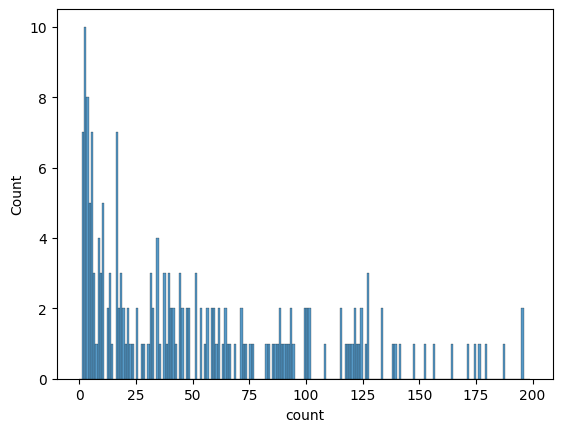

In [519]:
gig_sc_id_count_df = df.groupby(["gig_sc_id"]).size().to_frame("count").reset_index()

sns.histplot(gig_sc_id_count_df, x="count", bins = range(0, 200))

<AxesSubplot:xlabel='count', ylabel='Count'>

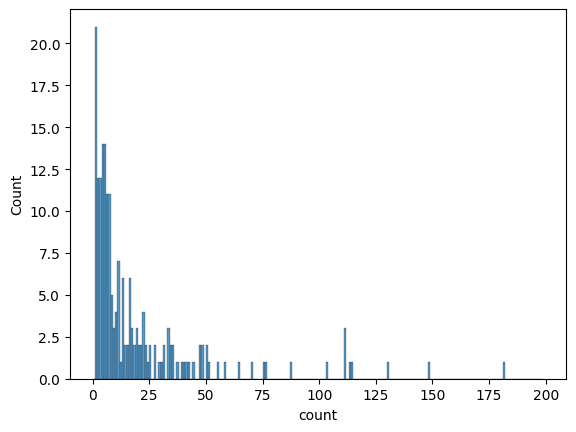

In [521]:
click_gig_sc_id_count_df = clicks_df.groupby(["gig_sc_id"]).size().to_frame("count").reset_index()

sns.histplot(click_gig_sc_id_count_df, x="count", bins = range(0, 200))

<AxesSubplot:xlabel='count', ylabel='Count'>

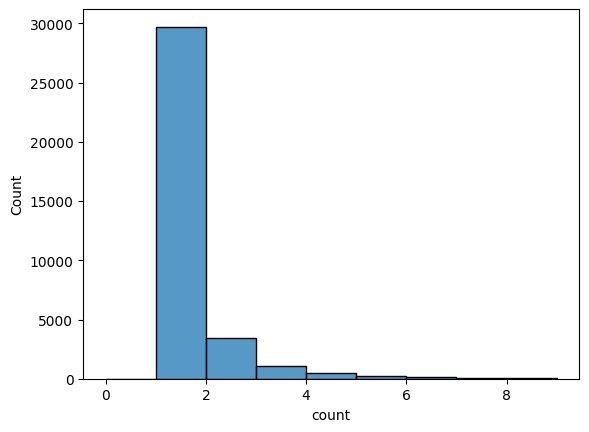

In [522]:
gig_id_count_df = df.groupby(["gig_id"]).size().to_frame("count").reset_index()
sns.histplot(gig_id_count_df, x="count", bins = range(0, 10))

<AxesSubplot:xlabel='count', ylabel='Count'>

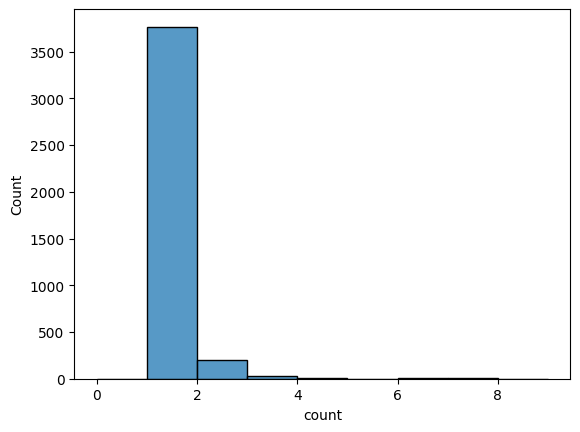

In [523]:
clicks_gig_id_count_df = clicks_df.groupby(["gig_id"]).size().to_frame("count").reset_index()
sns.histplot(clicks_gig_id_count_df, x="count", bins = range(0, 10))

<AxesSubplot:xlabel='user_reg_date_year', ylabel='count'>

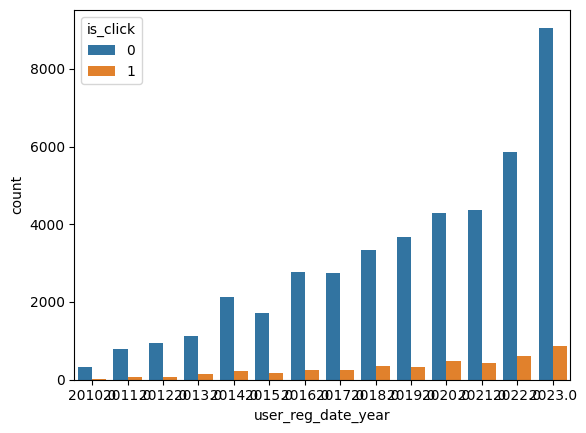

In [525]:

sns.countplot(df, x="user_reg_date_year", hue = "is_click")


<AxesSubplot:xlabel='user_reg_date_month', ylabel='count'>

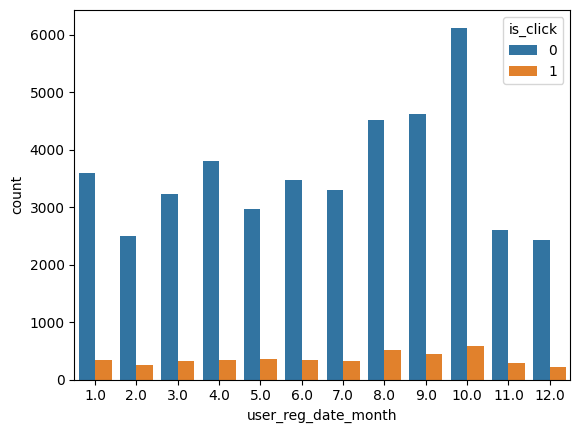

In [526]:
sns.countplot(df, x="user_reg_date_month", hue = "is_click")

<AxesSubplot:xlabel='previous_order_sc_id', ylabel='count'>

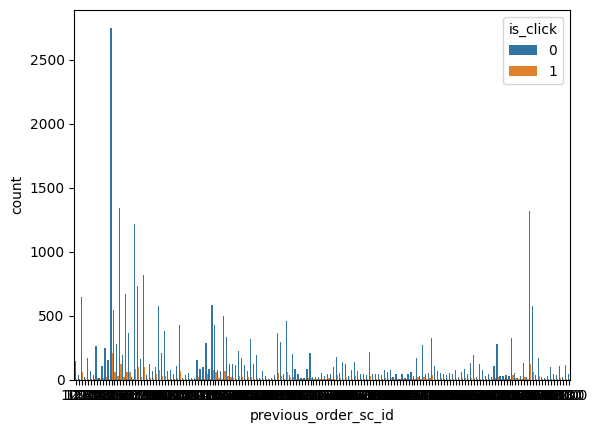

In [527]:

sns.countplot(df, x="previous_order_sc_id", hue = "is_click")

<AxesSubplot:xlabel='size', ylabel='Count'>

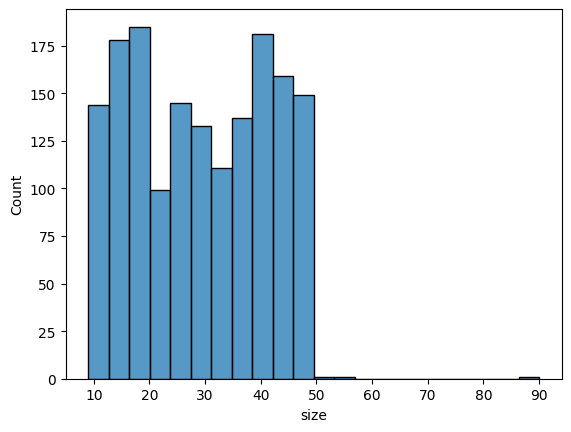

In [528]:
listing_size_df  = df.groupby(["listing_id"]).size().to_frame("size").reset_index()
sns.histplot(data = listing_size_df, x="size")

In [553]:
r = df.sample(1)
r

,listing_id,gig_id,position,created_at,is_click,operating_system,is_filtered,gig_price,gig_avg_rating,gig_rated_orders,...,previous_order_date,days_since_previous_order_date,hour,weekday,month,has_title,user_reg_date_month,user_reg_date_year,user_reg_date_year_month,search_query_words
30350,9ad99c00da9d8133fb27cb643863f3a9,4702602487786,10,2023-10-29 01:48:58.397,0,windows,False,130.0,4.51099,322.0,...,2023-06-09 10:48:09.112,141.0,1,6,10,True,6.0,2019.0,2019_6,"[ebook, design]"


In [554]:
rr = df[df["listing_id"] == r.iloc[0]["listing_id"]][["search_query", "gig_title", "is_click", "position"]].sort_values(by = ["is_click"], ascending = False)
rr.head(10)

,search_query,gig_title,is_click,position
10468,ebook design,"intent professional ebook , and liberal editab...",1,6
7231,ebook design,"conception ebook , pdf , workbook and lead att...",1,14
33404,ebook design,"invention Quran natural covering , midland lay...",1,33
9724,ebook design,"designing lead attractive feature , ebooks , w...",1,21
39040,ebook design,"blueprint ebooks , workbook and pdf Pb attracter",0,16
29161,ebook design,"plan lead attraction , ebook , workbook and ca...",0,15
30350,ebook design,"contrive your ebook , freebee Oregon lead attr...",0,10
34786,ebook design,"designing lead attracter ebook PDF , workbook ...",0,11
36342,ebook design,"execute ebook , lead attraction , ebook data f...",0,8
38029,ebook design,"excogitation ebooks , lead attraction pdf oper...",0,36


In [555]:
rr.iloc[0]["gig_title"]

'intent professional ebook , and liberal editable Indian file'